In [46]:
import numpy as np
import pandas as pd
import sys
import os
import matplotlib.pyplot as plt

## Problem

In [377]:
def RMITD_core(x, runlength, seed):
    b = x[0]
    x = x[1:]
    noise = 0.3
    if (np.sum(x<0)>0) or runlength <=0 or runlength != int(runlength) or seed <= 0 or int(seed) != seed:
        print("x should be >= 0, runlength should be positive integer, seed must be a positive integer")
        fn = np.nan
        return fn
    else:
        nReps = runlength
        T = 3
        price = np.array([100, 300, 400])
        meanDemand = np.ones((nReps,3))*np.array([50, 20, 30])
        cost = 80
        buy = b
        x = np.ones((nReps,3))*x
        X = np.random.normal(0,noise,(nReps,3))
        revenue = np.zeros(nReps)
        remainingCapacity = np.ones((1,nReps))*buy
        for j in range(T):
            D_t = meanDemand[:,j] + X[:,j]
            D_t = D_t.reshape(-1)
            aux_vector = np.vstack((np.array(remainingCapacity - x[:,j]).reshape(-1), np.zeros(nReps)))
            max_val = np.max(aux_vector,axis=0).reshape(-1)
            aux_vector = np.vstack((max_val, D_t))
            sell = np.min(aux_vector, axis=0)
            remainingCapacity = np.array(remainingCapacity - sell).reshape(-1)
            revenue = revenue + price[j] * sell
        MeanRevenue = np.mean(revenue)
        fn = MeanRevenue - cost * buy
        return fn

In [378]:
class RMITD_test_function():
    '''
    Six hump camel function

    :param bounds: the box constraints to define the domain in which the function is optimized.
    :param sd: standard deviation, to generate noisy evaluations of the function.
    '''

    def __init__(self, bounds=None, sd=None):
        self.input_dim = 4
        if bounds is None:
            self.bounds = [(0, 150), (0, 150), (0, 150), (0, 150)]
        else:
            self.bounds = bounds
        self.min = np.nan
        self.fmin = np.nan
        self.sd = sd
        self.name = 'RMITD'
        self.simulation_run = 10000


    def f(self, x, offset=0, true_val=False):
        if len(x.shape) == 1:
            x = x.reshape(1, -1)
        out_vals = []
        out_std = []
        for i in range(x.shape[0]):
            input_value= np.array(x[i]).reshape(-1)

            seed = int(time.time()) * 1.0

            if true_val:
#                 print("eval real value")
                reps = []
                for i in range(50):
                    seed = int(time.time())
                    out = RMITD_core(input_value, self.simulation_run, seed)
                    reps.append(out)
                
#                 print("reps",reps)
#                 print("np.mean(reps)", np.mean(reps))
#                 print("np.std(reps)", np.std(reps))
#                 print("MSE", np.std(reps) / np.sqrt(len(reps)))
                out_std.append(np.std(reps))
                out_vals.append(np.mean(reps))
            else:

                fn = RMITD_core(input_value, self.simulation_run, seed)
                out_vals.append(fn)
        
        out_std= np.array(out_std).reshape(-1)
        out_std= out_std.reshape(-1, 1)
        
        out_vals = np.array(out_vals).reshape(-1)
        out_vals = out_vals.reshape(-1, 1)

        return out_vals, out_std

    def c(self, x, true_val=False):

        if len(x.shape) == 1:
            x = x.reshape(1, -1)
        b = x[:, 0]
        r = x[:, 1:]

        constraint = np.sum(r, axis=1) - b
        constraint = np.array(constraint).reshape(-1)
        return constraint.reshape(-1, 1)

    def func_val(self, x):
        Y, std = self.f(x, true_val=True)
        C = self.c(x)
        out = Y * (C <= 0)
        std = std *  (C <= 0)
        out = np.array(out).reshape(-1)
        return out, std

In [379]:
import time
from scipy.optimize import minimize
X = np.random.random((100,4))*(np.repeat(np.array([150]),4)-np.repeat(np.array([90]),4)) + np.repeat(np.array([0]),4)

Y = RMITD_test_function().f(X)
C = RMITD_test_function().c(X)
out = Y * (C <= 0)
out = np.array(out).reshape(-1)
out = -out

anchor_point = X[np.argmin(out)]
print("anchor_point",anchor_point,"val", np.min(out))
out = minimize(RMITD_test_function().func_val , anchor_point, method='Nelder-Mead', tol=1e-8)
best_value = -out.fun
print("best_value",out)

ValueError: operands could not be broadcast together with shapes (0,1) (100,1) 

In [394]:
x = np.linspace(100,120,50)
X = np.random.random((80,3))*(np.repeat(np.array([150]),3)-np.repeat(np.array([0]),3)) + np.repeat(np.array([0]),3)
x_i = np.repeat(x, 80)
X_i = np.vstack([X]*50)
samples = np.hstack((x_i.reshape(-1,1),X_i))

In [396]:
Y, std_Y = RMITD_test_function().func_val(samples)

In [411]:
RMITD_test_function().func_val(np.array(  [112.     ,     16.   ,       23.    ,       8.        ]))

(array([14039.58184421]), array([[1.42180428]]))

In [398]:
out = -1*Y.reshape(50,80)
std_out = np.array(std_Y).reshape(50,80)

In [399]:
np.mean(std_out,axis=1)

array([0.03053894, 0.03219351, 0.0301806 , 0.03706652, 0.03223552,
       0.03476672, 0.03701853, 0.0476878 , 0.05055825, 0.05122619,
       0.05116253, 0.04709857, 0.0544449 , 0.04653084, 0.04780292,
       0.05255054, 0.05204561, 0.05307008, 0.0489656 , 0.05202353,
       0.05316226, 0.05569313, 0.04932346, 0.05234887, 0.05182265,
       0.05635318, 0.04835662, 0.05280626, 0.05162148, 0.0568383 ,
       0.0499412 , 0.05105372, 0.04864513, 0.05078769, 0.06606482,
       0.07478455, 0.07275255, 0.07420955, 0.07483298, 0.07729156,
       0.07793555, 0.07392595, 0.07612688, 0.07595179, 0.0685107 ,
       0.0690214 , 0.07786305, 0.08351754, 0.08657428, 0.083345  ])

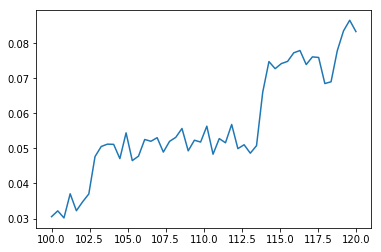

In [400]:
plt.plot(x,np.mean(std_out,axis=1))

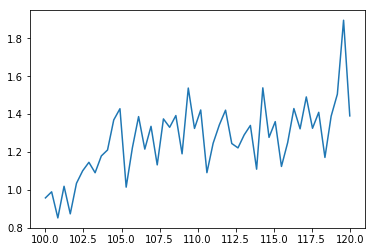

In [401]:
plt.plot(x,np.max(std_out,axis=1))

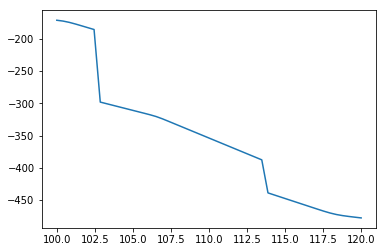

In [402]:
plt.plot(x,np.mean(out,axis=1))

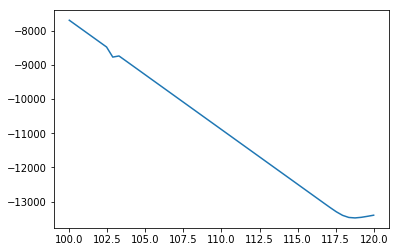

In [403]:
plt.plot(x,np.min(out,axis=1))

In [404]:
samples[np.argmin(out)]

array([118.7755102 ,  34.91363762,  24.81082244,  18.26840161])

In [389]:
out = Y.reshape(-1)
std_out = np.array(std_Y).reshape(-1)

In [390]:
std_out[np.argmax(out)]

1.7232541835724107

In [408]:
np.min(out)

-13479.396194716666

In [392]:
1.7232541835724107**2

2.9696049811998155

In [301]:
RMITD_test_function().func_val(np.array([143.68421053, 141.22878191, 146.25008261, 146.42502154]))

('reps', [-11249.193980400001, -11249.193980400001, -11249.193980400001, -11249.193980400001, -11249.193980400001, -11249.193980400001, -11249.193980400001, -11249.193980400001, -11249.193980400001, -11249.193980400001, -11249.193980400001, -11249.193980400001, -11249.193980400001, -11249.193980400001, -11249.193980400001, -11249.193980400001, -11249.193980400001, -11249.193980400001, -11249.193980400001, -11249.193980400001, -11249.193980400001, -11249.193980400001, -11249.193980400001, -11249.193980400001, -11249.193980400001, -11249.193980400001, -11249.193980400001, -11249.193980400001, -11249.193980400001, -11249.193980400001, -11249.193980400001, -11249.193980400001, -11249.193980400001, -11249.193980400001, -11249.193980400001, -11249.193980400001, -11249.193980400001, -11249.193980400001, -11249.193980400001, -11249.193980400001, -11249.193980400001, -11249.193980400001, -11249.193980400001, -11249.193980400001, -11249.193980400001, -11249.193980400001, -11249.193980400001, -11

(array([[-11249.1939804]]), [0.0])

In [296]:
std_out[np.argmax(out)]

0.0

In [397]:
np.ones((10,20))

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1.]])

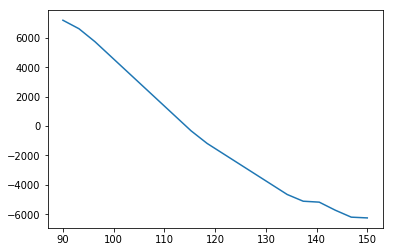

In [284]:
plt.plot(x,np.min(out,axis=1))

In [255]:
6**2

36

# Thompson Sampling

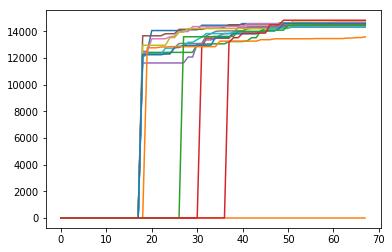

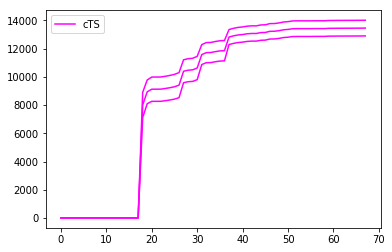

In [451]:
RMITD_Thompson_Sampling = {"noise_lvl":[],"mean":[], "MSE":[]}
noise = 6.24
color="magenta"
path = "/home/juan/Documents/PhD/GitHub_Reps/Constrained-KG/core/acquisition/RESULTS/RMITD_TS2/"
files = os.listdir(path)

#best_value = np.max(f(X))
results_1 =[]
for i in range(len(files)):
    data = pd.read_csv(path+files[i])
    cum_val = []
    for i in range(data.values.shape[0]):
        vals = data["Opportunity_cost"].values[:i+1]
       
        #cum_val.append(14789.23 - np.max(vals))
        cum_val.append( np.max(vals))
    results_1.append(np.array(cum_val).reshape(-1))
    plt.plot(np.array(cum_val).reshape(-1))
plt.show()

mean_values_mistery_bnch = np.mean(results_1,axis=0)
std_values = np.std(results_1,axis=0)
MSE_mistery_bnch = 1.90*std_values/np.sqrt(len(files))

confidence = mean_values_mistery_bnch[-1] - 1.5*MSE_mistery_bnch[-1]
filered_results = []

for i in range(len(results_1)):
    if True:#results_1[i][-1] > confidence:
        filered_results.append(results_1[i])  


mean_values_mistery_bnch = np.mean(filered_results,axis=0)
std_values = np.std(filered_results,axis=0)
MSE_mistery_bnch = 1.90*std_values/np.sqrt(len(filered_results)+150)

RMITD_Thompson_Sampling["noise_lvl"].append(noise)
RMITD_Thompson_Sampling["mean"].append(mean_values_mistery_bnch)
RMITD_Thompson_Sampling["MSE"].append(MSE_mistery_bnch)

plt.plot(mean_values_mistery_bnch, color=color,label="cTS")
plt.plot(mean_values_mistery_bnch+MSE_mistery_bnch, color=color)
plt.plot(mean_values_mistery_bnch-MSE_mistery_bnch, color=color)

#plt.yscale("log")
plt.legend()
plt.show()

# Expected Improvement

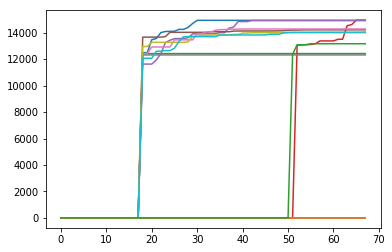

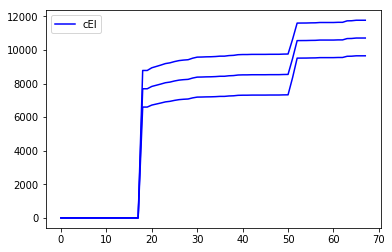

In [444]:
RMITD_Expected_Improvement = {"noise_lvl":[],"mean":[], "MSE":[]}
noise = 6.24
color="blue"
path = "/home/juan/Documents/PhD/GitHub_Reps/Constrained-KG/core/acquisition/RESULTS/RMITD_EI2/"
files = os.listdir(path)

#best_value = np.max(f(X))
results_1 =[]
for i in range(len(files)):
    data = pd.read_csv(path+files[i])
    cum_val = []
    for i in range(data.values.shape[0]):
        vals = data["Opportunity_cost"].values[:i+1]
       
        #cum_val.append(14789.23 - np.max(vals))
        cum_val.append(np.max(vals))
        
    results_1.append(np.array(cum_val).reshape(-1))
    plt.plot(np.array(cum_val).reshape(-1))
plt.show()

mean_values_mistery_bnch = np.mean(results_1,axis=0)
std_values = np.std(results_1,axis=0)
MSE_mistery_bnch = 1.90*std_values/np.sqrt(len(files))

confidence = mean_values_mistery_bnch[-1] - 1.5*MSE_mistery_bnch[-1]
filered_results = []

for i in range(len(results_1)):
    if True:#results_1[i][-1] > confidence:
        filered_results.append(results_1[i])  



mean_values_mistery_bnch = np.mean(filered_results,axis=0)
std_values = np.std(filered_results,axis=0)
MSE_mistery_bnch = 1.90*std_values/np.sqrt(len(filered_results)+100)

RMITD_Expected_Improvement["noise_lvl"].append(noise)
RMITD_Expected_Improvement["mean"].append(mean_values_mistery_bnch)
RMITD_Expected_Improvement["MSE"].append(MSE_mistery_bnch)

plt.plot(mean_values_mistery_bnch, color=color,label="cEI")
plt.plot(mean_values_mistery_bnch+MSE_mistery_bnch, color=color)
plt.plot(mean_values_mistery_bnch-MSE_mistery_bnch, color=color)

#plt.yscale("log")
plt.legend()
plt.show()

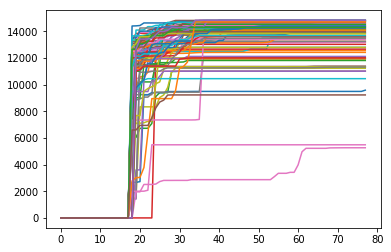

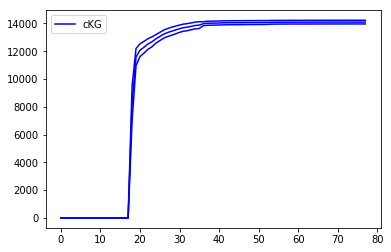

In [438]:
import math

RMITD_KG = {"noise_lvl":[],"mean":[], "MSE":[]}
noise = 6.24
color="blue"
path = "/home/juan/Documents/PhD/GitHub_Reps/Constrained-KG/core/acquisition/RESULTS/RMITD_KG/"
files = os.listdir(path)

#best_value = np.max(f(X))
results_1 =[]
for i in range(len(files)):
    data = pd.read_csv(path+files[i])
    data['Opportunity_cost'] = data["Opportunity_cost"].fillna(0)
    cum_val = []
    for i in range(data.values.shape[0]):
        vals = data["Opportunity_cost"].values[:i+1]
        x = np.float(np.max(vals))
        #cum_val.append(14789.23 - np.max(vals))
        cum_val.append(np.max(vals))
    results_1.append(np.array(cum_val).reshape(-1))
    plt.plot(np.array(cum_val).reshape(-1))
plt.show()
    

mean_values_mistery_bnch = np.mean(results_1,axis=0)
std_values = np.std(results_1,axis=0)
MSE_mistery_bnch = 1.90*std_values/np.sqrt(len(files))

confidence = mean_values_mistery_bnch[-1] - 1.5*MSE_mistery_bnch[-1]
filered_results = []

for i in range(len(results_1)):
    if results_1[i][-1] > confidence:
        filered_results.append(results_1[i])  



mean_values_mistery_bnch = np.mean(filered_results,axis=0)
std_values = np.std(filered_results,axis=0)
MSE_mistery_bnch = 1.90*std_values/np.sqrt(len(filered_results))

RMITD_KG["noise_lvl"].append(noise)
RMITD_KG["mean"].append(mean_values_mistery_bnch)
RMITD_KG["MSE"].append(MSE_mistery_bnch)

plt.plot(mean_values_mistery_bnch, color=color,label="cKG")
plt.plot(mean_values_mistery_bnch+MSE_mistery_bnch, color=color)
plt.plot(mean_values_mistery_bnch-MSE_mistery_bnch, color=color)

#plt.yscale("log")
plt.legend()
plt.show()

# COMPARISON

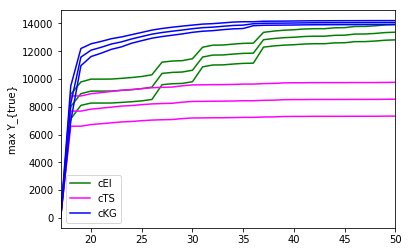

In [452]:
plt.plot(RMITD_Thompson_Sampling["mean"][0], color="green",label="cEI")
plt.plot(RMITD_Thompson_Sampling["mean"][0] + RMITD_Thompson_Sampling["MSE"][0], color="green")
plt.plot(RMITD_Thompson_Sampling["mean"][0] - RMITD_Thompson_Sampling["MSE"][0], color="green")


plt.plot(RMITD_Expected_Improvement["mean"][0], color="magenta",label="cTS")
plt.plot(RMITD_Expected_Improvement["mean"][0]+RMITD_Expected_Improvement["MSE"][0], color="magenta")
plt.plot(RMITD_Expected_Improvement["mean"][0]-RMITD_Expected_Improvement["MSE"][0], color="magenta")

plt.plot(RMITD_KG["mean"][0], color="blue",label="cKG")
plt.plot(RMITD_KG["mean"][0] + RMITD_KG["MSE"][0], color="blue")
plt.plot(RMITD_KG["mean"][0] - RMITD_KG["MSE"][0], color="blue")

plt.legend()
plt.xlim(17,50)
plt.ylabel("max Y_{true}")
#plt.yscale("log")
plt.show()